In [2]:
# Import the necessary packages.

from sklearn.datasets import load_iris

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from seaborn import set_style
set_style("whitegrid")

In [3]:
# Load the data.
date = pd.read_csv("../Data/dim_date.csv")
claims = pd.read_csv("../Data/dim_claims.csv")
pa = pd.read_csv("../Data/dim_pa.csv")
bridge = pd.read_csv("../Data/bridge.csv")

In [4]:
# Join claims with bridge, in df dataframe.
df = claims.copy()
df = df.set_index('dim_claim_id').join(bridge.set_index('dim_claim_id'))
df.head()

,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,dim_date_id
dim_claim_id,,,,,,
1,417380,A,75.0,0,1.0,1
2,999001,A,NaN,1,NaN,1
3,417740,A,76.0,0,2.0,1
4,999001,A,NaN,1,NaN,1
5,417740,A,NaN,1,NaN,1


In [5]:
# Join the pa with rejected claims, in pa_df dataframe.

pa_df = df.copy().dropna()
pa_df = pa_df.set_index('dim_pa_id').join(pa.set_index('dim_pa_id'))
pa_df.head()

,bin,drug,reject_code,pharmacy_claim_approved,dim_date_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
dim_pa_id,,,,,,,,,
1.0,417380,A,75.0,0,1,1,1,0,1
2.0,417740,A,76.0,0,1,1,0,0,1
3.0,417380,A,75.0,0,1,0,0,1,1
4.0,999001,A,76.0,0,1,1,1,0,1
5.0,417614,A,70.0,0,1,0,1,0,1


In [6]:
# Join the claims with dates, in claims_date dataframe.

claims_date = df.copy()
claims_date = claims_date.set_index('dim_date_id').join(date.set_index('dim_date_id'))
claims_date.head()

,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
dim_date_id,,,,,,,,,,,,,
1,417380,A,75.0,0,1.0,2017-01-01,2017,1,1,1,0,0,1
1,999001,A,NaN,1,NaN,2017-01-01,2017,1,1,1,0,0,1
1,417740,A,76.0,0,2.0,2017-01-01,2017,1,1,1,0,0,1
1,999001,A,NaN,1,NaN,2017-01-01,2017,1,1,1,0,0,1
1,417740,A,NaN,1,NaN,2017-01-01,2017,1,1,1,0,0,1


In [7]:
# Pharmacy claim approval rate calculation.

vals = claims.pharmacy_claim_approved.value_counts()
claims_app_rate = vals[1] / (vals[0] + vals[1])

print((claims_app_rate * 100).round(2),'% of the claims are approved.' )


58.37 % of the claims are approved.


0.5837369045265863

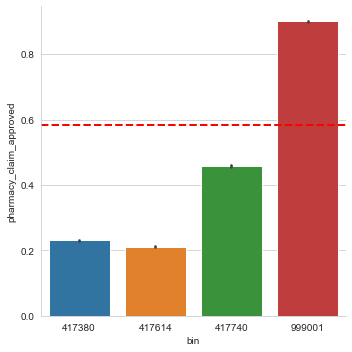

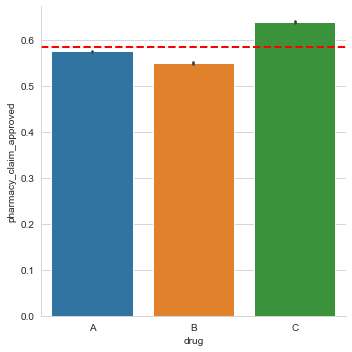

In [8]:
#Bar plots for bin and drug type.

sns.catplot(x = 'bin', kind='bar', y = 'pharmacy_claim_approved', data = claims).map(plt.axhline, y=claims_app_rate, ls='--', color='r', linewidth=2)
sns.catplot(x = 'drug', kind='bar', y = 'pharmacy_claim_approved', data = claims).map(plt.axhline, y=claims_app_rate, ls='--', color='r', linewidth=2)
plt.show()

In [35]:
# PA claim approval rate calculation.

vals = pa_df.pa_approved.value_counts()
pa_df.pa_approved.value_counts()

pa_app_rate = vals[1] / (vals[0] + vals[1])

print((pa_app_rate * 100).round(2),'% of the pa claims are approved.' )


73.45 % of the pa claims are approved.


0.734451417481037

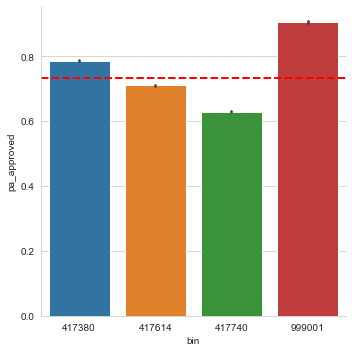

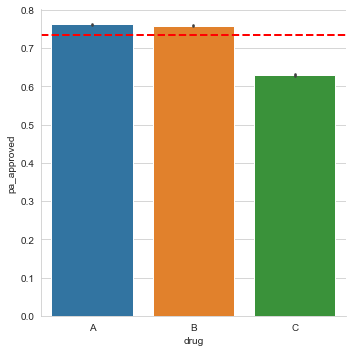

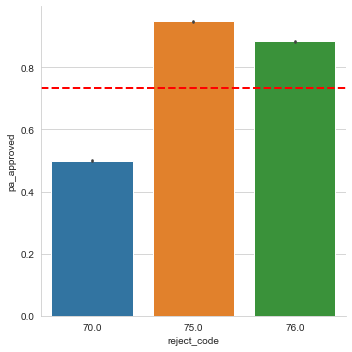

In [42]:

sns.catplot(x = 'bin', kind='bar', y = 'pa_approved', data = pa_df).map(plt.axhline, y=pa_app_rate, ls='--', color='r', linewidth=2)
sns.catplot(x = 'drug', kind='bar', y = 'pa_approved', data = pa_df).map(plt.axhline, y=pa_app_rate, ls='--', color='r', linewidth=2)
sns.catplot(x = 'reject_code', kind='bar', y = 'pa_approved', data = pa_df).map(plt.axhline, y=pa_app_rate, ls='--', color='r', linewidth=2)

plt.show()

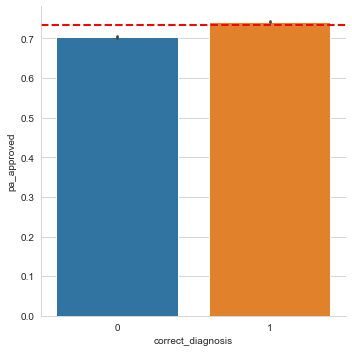

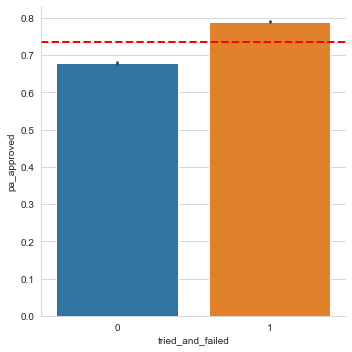

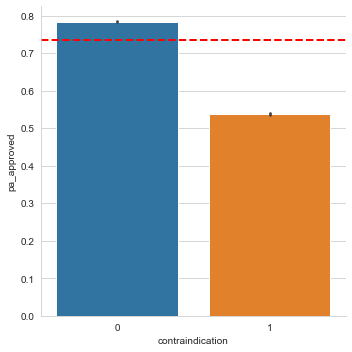

In [43]:
sns.catplot(x = 'correct_diagnosis', kind='bar', y = 'pa_approved', data = pa_df).map(plt.axhline, y=pa_app_rate, ls='--', color='r', linewidth=2)
sns.catplot(x = 'tried_and_failed', kind='bar', y = 'pa_approved', data = pa_df).map(plt.axhline, y=pa_app_rate, ls='--', color='r', linewidth=2)
sns.catplot(x = 'contraindication', kind='bar', y = 'pa_approved', data = pa_df).map(plt.axhline, y=pa_app_rate, ls='--', color='r', linewidth=2)
plt.show()

The following calculates and graphs the monthly pharmacy claim volume.

In [101]:

claims_date['date_val'] = pd.to_datetime(claims_date['date_val'])
claims_date.head()

,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
dim_date_id,,,,,,,,,,,,,
1,417380,A,75.0,0,1.0,2017-01-01,2017,1,1,1,0,0,1
1,999001,A,NaN,1,NaN,2017-01-01,2017,1,1,1,0,0,1
1,417740,A,76.0,0,2.0,2017-01-01,2017,1,1,1,0,0,1
1,999001,A,NaN,1,NaN,2017-01-01,2017,1,1,1,0,0,1
1,417740,A,NaN,1,NaN,2017-01-01,2017,1,1,1,0,0,1


In [105]:
claims_date['one'] = 1
claims_date.head()

,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,one
dim_date_id,,,,,,,,,,,,,,
1,417380,A,75.0,0,1.0,2017-01-01,2017,1,1,1,0,0,1,1
1,999001,A,NaN,1,NaN,2017-01-01,2017,1,1,1,0,0,1,1
1,417740,A,76.0,0,2.0,2017-01-01,2017,1,1,1,0,0,1,1
1,999001,A,NaN,1,NaN,2017-01-01,2017,1,1,1,0,0,1,1
1,417740,A,NaN,1,NaN,2017-01-01,2017,1,1,1,0,0,1,1


In [110]:

claims_date['month'] = claims_date['calendar_year'].apply(str) + "-" + claims_date['calendar_month'].apply(str) + "-1"

In [114]:
claims_date['month'] = pd.to_datetime(claims_date['month'])


In [115]:
ts = claims_date.groupby('month').count()



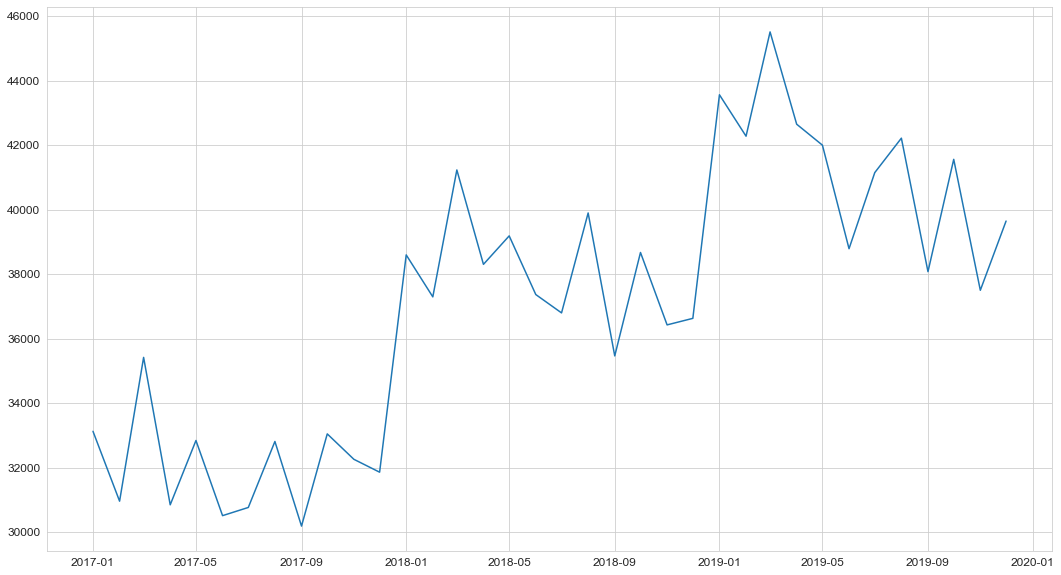

In [120]:
plt.figure(figsize=(18,10))

plt.plot(ts.index,
            ts.bin)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()